In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
import codesModel as codeM


In [26]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
data = pd.read_csv('./dataBacktesting.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes       Close               CloseNext                    High  \
Symbol             IBM         PEP         IBM         PEP         IBM   
1985-03-01   14.030176    1.134058   13.939824    1.132171   14.120527   
1985-03-04   13.939824    1.132171   13.939824    1.155759   14.081804   
1985-03-05   13.939824    1.155759   13.720400    1.138069   14.030175   
1985-03-06   13.720400    1.138069   13.436437    1.135119   13.991452   
1985-03-07   13.436437    1.135119   13.384818    1.132171   13.772025   
...                ...         ...         ...         ...         ...   
2021-04-23  140.856171  145.830002  140.005692  143.360001  142.023140   
2021-04-26  140.005692  143.360001  140.440826  142.889999  142.042927   
2021-04-27  140.440826  142.889999  141.419891  141.830002  140.984752   
2021-04-28  141.419891  141.830002  142.646194  143.940002  141.815465   
2021-04-29  142.646194  143.940002         NaN         NaN  147.096471   

Attributes                     Low                    Open              \
Symbol             PEP         IBM         PEP         IBM         PEP   
1985-03-01    1.145750   13.836567    1.116522   13.888196    1.122367   
1985-03-04    1.143964   13.875288    1.126275   14.068897    1.138068   
1985-03-05    1.161655   13.901102    1.132172   13.978546    1.135120   
1985-03-06    1.158708   13.707493    1.135120   13.952730    1.155759   
1985-03-07    1.143964   13.423529    1.123326   13.668767    1.132171   
...                ...         ...         ...         ...         ...   
2021-04-23  146.339996  139.392529  145.059998  139.748551  145.509995   
2021-04-26  145.770004  139.916675  142.979996  140.846290  145.550003   
2021-04-27  143.179993  139.194754  142.130005  140.124370  142.619995   
2021-04-28  143.690002  140.529842  141.729996  141.340774  143.490005   
2021-04-29  144.429993  141.400107  141.970001  142.537409  142.100006   

Attributes   Volume                bop                 ema20              \
Symbol          IBM      PEP       IBM       PEP         IBM         PEP   
1985-03-01  5532000  3880800  0.500000  0.399990   14.030176    1.134058   
1985-03-04  3560400  3142800 -0.625000 -0.333343   14.021571    1.133879   
1985-03-05  4040000  5153400 -0.300000  0.700006   14.013786    1.135962   
1985-03-06  4120000  3722400 -0.818182 -0.749982   13.985844    1.136163   
1985-03-07  7028000  4624200 -0.666667  0.142847   13.933520    1.136064   
...             ...      ...       ...       ...         ...         ...   
2021-04-23  4556000  4354700  0.421050  0.250006  133.983197  143.003346   
2021-04-26  4710800  5817700 -0.395343 -0.784945  134.556768  143.037313   
2021-04-27  3884000  4693700  0.176791  0.257150  135.117154  143.023283   
2021-04-28  3768100  4962700  0.061540 -0.846938  135.717415  142.909637   
2021-04-29  4353900  4699900  0.019097  0.747969  136.377299  143.007767   

Attributes      ema200                   lower                    ma20  \
Symbol             IBM         PEP         IBM         PEP         IBM   
1985-03-01   14.030176    1.134058         NaN         NaN         NaN   
1985-03-04   14.029277    1.134040         NaN         NaN         NaN   
1985-03-05   14.028387    1.134256         NaN         NaN         NaN   
1985-03-06   14.025323    1.134294         NaN         NaN         NaN   
1985-03-07   14.019463    1.134302         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2021-04-23  122.718700  136.941129  127.509733  140.396457  134.125881   
2021-04-26  122.890710  137.004998  127.265145  140.455211  134.382513   
2021-04-27  123.065338  137.063556  127.071209  140.392265  134.686616   
2021-04-28  123.247970  137.110983  126.948194  140.293812  135.096041   
2021-04-29  123.440987  137.178933  126.987805  140.564317  135.638976   

Attributes                  macd            momentum              signal  \
Symbol             PEP       IBM       PEP    

In [27]:
stocks_list = data.xs('Close', level=0, axis=1).columns
for i in stocks_list:
    print("stock",i)
    # Cual es el máximo de datos faltantes en un mismo registro?
    print(max(data.xs(i, level=1, axis=1).isnull().sum(axis=1)))
    #Cuantos datos faltantes hay por cada atributo?
    print(data.xs(i, level=1, axis=1).isnull().sum())

stock IBM
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           0
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock PEP
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           0
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64


In [28]:
#se borran estas fechas las cuales estan vacias en todas las acciones
date_drops = ['2021-04-29']
data.drop(date_drops, axis=0, errors='ignore', inplace=True)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)

In [29]:
#borrar desde 1980
data.drop(data.index[:data.index.get_loc('1985-03-05')], axis=0, inplace=True)

In [30]:
# missing values in the data are interpolated using forward-fill (‘ffill ()’)method to propagate last valid observation forward.
data = data.fillna(method='bfill')

In [31]:
#se borran estos datos debido a la alta correlacion
attributes_to_erase = ('High','Low','Open','ma20','lower','upper','ema20')
for i in attributes_to_erase:
    data=data.drop(i, axis=1, level=0)

In [32]:
data.drop(data.index[data.index.get_loc('2021-04-01'):], axis=0, inplace=True)

In [33]:
data

Attributes       Close               CloseNext               Volume           \
Symbol             IBM         PEP         IBM         PEP      IBM      PEP   
1985-03-05   13.939824    1.155759   13.720400    1.138069  4040000  5153400   
1985-03-06   13.720400    1.138069   13.436437    1.135119  4120000  3722400   
1985-03-07   13.436437    1.135119   13.384818    1.132171  7028000  4624200   
1985-03-08   13.384818    1.132171   13.578421    1.135119  6892000  2764800   
1985-03-11   13.578421    1.135119   13.617147    1.149862  4204000  1609200   
...                ...         ...         ...         ...      ...      ...   
2021-03-25  131.599625  139.630005  134.873047  142.699997  5554000  5827600   
2021-03-26  134.873047  142.699997  134.358780  144.809998  5567600  6785600   
2021-03-29  134.358780  144.809998  133.231384  142.539993  4622700  6105800   
2021-03-30  133.231384  142.539993  131.787506  141.449997  4790400  4372700   
2021-03-31  131.787506  141.449997  131.757843  141.279999  4945100  6257900   

Attributes       bop                ema200                  macd            \
Symbol           IBM       PEP         IBM         PEP       IBM       PEP   
1985-03-05 -0.300000  0.700006   14.028387    1.134256 -0.012772  0.001615   
1985-03-06 -0.818182 -0.749982   14.025323    1.134294 -0.034491  0.001568   
1985-03-07 -0.666667  0.142847   14.019463    1.134302 -0.073766  0.001279   
1985-03-08 -0.466667 -0.400007   14.013148    1.134281 -0.107814  0.000802   
1985-03-11  0.812500 -0.333371   14.008822    1.134289 -0.117817  0.000655   
...              ...       ...         ...         ...       ...       ...   
2021-03-25  0.789627  0.235608  120.173539  135.452192  2.532394  1.117782   
2021-03-26  0.919646  0.795867  120.319802  135.524310  2.919567  1.577161   
2021-03-29 -0.076919  0.763778  120.459494  135.616705  3.148612  2.087419   
2021-03-30 -0.506666 -0.433459  120.586577  135.685593  3.202247  2.282323   
2021-03-31 -0.639999 -0.865744  120.698029  135.742950  3.092595  2.322064   

Attributes  momentum              signal              std20d            
Symbol           IBM       PEP       IBM       PEP       IBM       PEP  
1985-03-05  0.000000  0.023587 -0.003708  0.000299  0.324364  0.047906  
1985-03-06 -0.219424 -0.017689 -0.009864  0.000553  0.324364  0.047906  
1985-03-07 -0.283963 -0.002950 -0.022645  0.000698  0.324364  0.047906  
1985-03-08 -0.051619 -0.002948 -0.039678  0.000719  0.324364  0.047906  
1985-03-11  0.193603  0.002948 -0.055306  0.000706  0.324364  0.047906  
...              ...       ...       ...       ...       ...       ...  
2021-03-25  2.422943  0.820007  2.005483  0.046248  4.155823  3.492027  
2021-03-26  3.273422  3.069992  2.188299  0.352431  4.345533  3.866542  
2021-03-29 -0.514267  2.110001  2.380362  0.699429  4.474108  4.412754  
2021-03-30 -1.127396 -2.270004  2.544739  1.016007  4.342329  4.590686  
2021-03-31 -1.443878 -1.089996  2.654310  1.277219  4.193578  4.445989  

[9093 rows x 18 columns]

## 1) Modelo donde escalamos las variables independientes y la dependiente

In [34]:
Params = {
    "hidden_layer_sizes": (200,200,200),
    "activation": 'logistic',
    "solver":'sgd',
    "alpha":0.001,
    "learning_rate":'adaptive'
}
model=MLPRegressor(max_iter=1000, hidden_layer_sizes=Params['hidden_layer_sizes'], 
                   activation=Params['activation'],solver=Params['solver'],alpha=Params['alpha'],
                   learning_rate=Params['learning_rate'])

## separar los datos manualmente

In [35]:
data_train_scaler = data.drop(data.index[data.index.get_loc('2020-09-30'):], axis=0)
data_test_scaler = data.drop(data.index[:data.index.get_loc('2020-09-30')], axis=0)
#2021-03-31

## all stocks

In [36]:
PRED=codeM.allStockManually(data_train_scaler,data_test_scaler,model,8, isScaled=True)

'PEP'

mae: 2.800701731920346
rmse: 3.3932586381866874


'IBM'

mae: 2.6897824056479394
rmse: 3.4344058564949735


In [37]:
PRED=[[134.15666539, 135.08841602, 134.04993866, 133.9943509 ,
        133.18611071, 133.71948047, 134.1710723 , 134.56099019,
        136.62622976, 137.896621  , 137.87066665, 137.59977215,
        137.75889289, 136.67863109, 136.45623295, 136.02250081,
        135.56019082, 135.20174419, 134.61072114, 134.98418445,
        133.31871194, 133.27661976, 133.18349988, 133.91951175,
        134.65501495, 135.02967538, 135.15155862, 135.34680235,
        135.35931455, 136.73940243, 138.01114096, 138.35956338,
        139.19179008, 140.24255517, 140.4879161 , 139.90639495,
        140.0856316 , 140.29156608, 140.24140034, 140.87644744,
        140.80669566, 140.82455941, 140.31336448, 140.90651011,
        140.12172995, 140.3718658 , 140.88919145, 140.4830466 ,
        140.15521552, 140.2542595 , 139.87744016, 140.10819053,
        139.84002971, 140.14483345, 140.3341725 , 140.7440688 ,
        141.51090782, 140.84029088, 140.08090647, 140.21363415,
        140.4726998 , 141.47035071, 141.88393136, 142.05829132,
        142.72644701, 141.13903184, 141.3091252 , 140.71925453,
        140.60869716, 141.39533004, 140.62996301, 140.52250239,
        141.09267066, 140.87223738, 140.80907432, 141.15123132,
        140.8762533 , 140.27089748, 139.97984148, 140.77001672,
        141.50570921, 139.95660643, 140.24111952, 139.06387655,
        138.82482056, 139.37681651, 139.12398134, 139.82200085,
        140.41031581, 140.0179916 , 139.61662039, 138.87611818,
        137.79193518, 137.42620359, 137.69713324, 137.69535634,
        138.03204175, 136.97684418, 136.89078245, 137.22169883,
        136.80455291, 136.09319204, 135.8620516 , 136.47160258,
        136.72186973, 135.95830233, 136.19897932, 137.83074738,
        137.0571818 , 136.66525059, 136.8517387 , 136.446658  ,
        136.36992776, 136.40007689, 136.93564103, 136.81533557,
        136.29424192, 137.45370576, 139.31343588, 140.7755556 ,
        140.94787363, 141.6737556 , 143.54928215, 145.17987646,
        144.60257882, 144.10940491],[ 118.7917132 , 118.15660763, 117.81313731, 118.45340523,
        118.28267801, 119.52452122, 121.57627414, 121.79066871,
        122.3173631 , 121.35215859, 122.15314819, 121.72280507,
        122.24611365, 121.78254192, 116.36174655, 116.36585718,
        116.65754312, 116.88904737, 114.66095289, 113.9199209 ,
        111.84564381, 112.80609057, 113.53558504, 113.92602363,
        114.29612143, 112.85860846, 113.72195997, 112.86529852,
        113.56104799, 114.72506832, 114.22380069, 112.55328283,
        113.47328058, 113.73603728, 113.55884938, 113.1182827 ,
        113.42676863, 113.1345107 , 114.63211505, 116.79527262,
        117.10746423, 117.59926464, 116.97733169, 117.03159372,
        118.15647683, 117.52899589, 119.56092087, 118.00630148,
        119.07325947, 119.7785871 , 119.16184052, 118.84813262,
        118.39924777, 119.79530593, 119.56747343, 119.60595875,
        119.28541507, 117.9005283 , 118.10540384, 118.47182195,
        119.03041667, 118.9791649 , 118.54465743, 118.90250019,
        119.78320157, 118.6761357 , 119.82266108, 121.62412024,
        122.17376497, 122.2886732 , 122.57263732, 123.42945057,
        122.02052443, 123.43293982, 123.6243013 , 124.18004715,
        125.01405966, 125.42540109, 116.76042321, 119.32472377,
        121.51950452, 121.22459209, 120.42779821, 119.58076989,
        120.8614634 , 120.21674052, 119.99274926, 121.0773625 ,
        121.34414652, 122.09097494, 122.24632476, 122.29452132,
        121.57507354, 121.64072041, 120.87702651, 120.96091759,
        120.92543769, 119.2508535 , 120.29064601, 120.24479482,
        121.58620154, 121.3029977 , 119.15317527, 120.45391378,
        120.30140299, 121.07514017, 119.7085091 , 121.3742624 ,
        122.58416173, 122.62915717, 124.91509932, 125.14399121,
        125.96944109, 126.95211369, 127.04359811, 127.85186859,
        128.59735783, 127.92889602, 129.60442336, 129.85370915,
        130.30801828, 131.60472912, 133.28113177, 133.58028443,
        133.4730978 , 133.2036123]]

In [38]:
serie = data_test_scaler.xs('PEP', level=1, axis=1)
attributes= ('CloseNext','Volume', 'bop','ema200', 'macd', 'momentum','signal', 'std20d')
for i in attributes:
    serie=serie.drop([i], axis=1)
serie['Predict'] = PRED[0]

In [39]:
serie

Attributes,Close,Predict
2020-09-30,136.529419,134.156665
2020-10-01,138.696548,135.088416
2020-10-02,135.997482,134.049939
2020-10-05,135.869415,133.994351
2020-10-06,133.672729,133.186111
...,...,...
2021-03-25,139.630005,141.673756
2021-03-26,142.699997,143.549282
2021-03-29,144.809998,145.179876
2021-03-30,142.539993,144.602579


In [40]:
def backtesting(prices_df, init_capital, verbose=False):
    data_signal = pd.DataFrame(index=prices_df.index)
    data_signal['price'] = prices_df.Close
    data_signal['daily_difference'] = prices_df.Predict - data_signal['price'] 
    data_signal['signal'] = 0.0
    data_signal['signal'][:] = np.where(data_signal['daily_difference'][:] > 0, 1.0, 0.0)   # If prediction for the next day is greater than the actual price buy (signal 1)
                                                                                            # Else, sell (signal 0)

    data_signal['positions'] = data_signal['signal'].diff()                                 # By making the difference of the signals the algorithm will not overbuy or oversell the same stock
 
    positions = pd.DataFrame(index=data_signal.index).fillna(0.0)
    portfolio = pd.DataFrame(index=data_signal.index).fillna(0.0)
    #data_signal['positions']=data_signal['positions'].abs()
    positions['stock'] = data_signal['signal']

    portfolio['positions'] = (positions.multiply(data_signal['price'], axis=0))             # Multiply the signal (1 or 0) to indicate with money if they have a position or not
    pos_diff = positions.diff()
    pos_diff['stock'][0] = 1.0 if data_signal['signal'][0] == 1.0 else 0.0                  # Indicates to the algorithm that the first signal is approved
    portfolio['cash'] = init_capital - (pos_diff.multiply(data_signal['price'], axis=0)).cumsum()
    portfolio['total'] = portfolio['positions'] + portfolio['cash']

    if verbose:
        print(data_signal,'\n')
        print(positions,'\n')
        print(portfolio,'\n')

    return portfolio

In [41]:
result=backtesting(serie, 1000)

In [42]:
result

,positions,cash,total
2020-09-30,0.000000,1000.000000,1000.000000
2020-10-01,0.000000,1000.000000,1000.000000
2020-10-02,0.000000,1000.000000,1000.000000
2020-10-05,0.000000,1000.000000,1000.000000
2020-10-06,0.000000,1000.000000,1000.000000
...,...,...,...
2021-03-25,139.630005,863.340927,1002.970932
2021-03-26,142.699997,863.340927,1006.040924
2021-03-29,144.809998,863.340927,1008.150925
2021-03-30,142.539993,863.340927,1005.880920


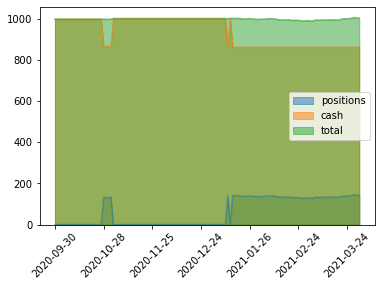

In [43]:
result.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.show()

In [44]:
serie = data_test_scaler.xs('IBM', level=1, axis=1)
attributes= ('CloseNext','Volume', 'bop','ema200', 'macd', 'momentum','signal', 'std20d')
for i in attributes:
    serie=serie.drop([i], axis=1)
serie['Predict'] = PRED[1]

In [45]:
result=backtesting(serie, 1000)
result

,positions,cash,total
2020-09-30,117.041725,882.958275,1000.000000
2020-10-01,116.483788,882.958275,999.442062
2020-10-02,115.983566,882.958275,998.941841
2020-10-05,117.368790,882.958275,1000.327065
2020-10-06,117.330315,882.958275,1000.288589
...,...,...,...
2021-03-25,131.599625,887.244232,1018.843857
2021-03-26,0.000000,1022.117279,1022.117279
2021-03-29,0.000000,1022.117279,1022.117279
2021-03-30,133.231384,888.885895,1022.117279


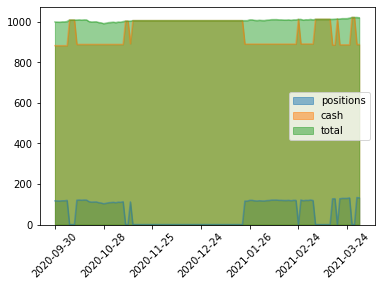

In [46]:
result.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.show()